In [194]:
import os
import numpy as np
import pandas as pd
os.chdir("C:/Users/marci/dev/DAFT_0116_OTALORAMarcia/Module_1/Lab_33_Intro-to-Data-Preparation")
print(os.getcwd())
import seaborn as sns

C:\Users\marci\dev\DAFT_0116_OTALORAMarcia\Module_1\Lab_33_Intro-to-Data-Preparation


### 1 Read data and inspect

In [195]:
data_folder = "/data/"
fname = "example_data_cleaning.xlsx"
#%%
df = pd.read_excel(f"{os.getcwd()}{data_folder}{fname}")
#df["BirthYear"] = pd.to_datetime(df["BirthYear"],format="%Y")
df.columns



Index(['TransactionID', 'ClientID', 'BirthYear', 'Amount', 'Profession',
       'Department', 'Risk'],
      dtype='object')

In [196]:
df.head(n=30)

,TransactionID,ClientID,BirthYear,Amount,Profession,Department,Risk
0,4,34985,1923.000000,5670,manager,78,Low
1,16,34997,1923.000000,2399090,developer,78,High
2,25,35006,1923.000000,33050,HR,78,High
3,12,34993,1939.142857,23430,professor,78,Low
4,21,35002,1939.142857,16770,manager,78,Low
5,11,34992,1943.857143,21210,researcher,78,Medium
6,20,35001,1943.857143,14550,student,78,Medium
7,3,34984,1945.000000,3450,student,78,Medium
8,19,35000,1948.571429,12330,barmen,78,High
9,9,34990,1953.285714,16770,Manager,78,Medium


Column Department is the same for all elements so dropping it.

In [197]:
#First all Clients are from the same Department --> 78
df_clean = df.drop(labels="Department",axis=1)

In [198]:
df_clean["Profession"] = df_clean["Profession"].apply(lambda x: x.lower() if isinstance(x,str) else x)
df_clean["Profession"]

0         manager
1       developer
2              hr
3       professor
4         manager
5      researcher
6         student
7         student
8          barmen
9         manager
10             hr
11        manager
12        manager
13             hr
14            bdm
15            NaN
16            NaN
17             hr
18       etudient
19            bdm
20            bdm
21       etudient
22        manager
23    hairdresser
24       etudient
25        student
26         barmen
27         driver
28         sailer
29        manager
Name: Profession, dtype: object

### 2 Checking for duplicates

Checking for transaction ID duplicated values, assuming there is supposed to be only 1 per row

In [199]:
df_clean[df_clean.duplicated(subset="TransactionID")].shape[0]

0

Client ID does not necessarily need to be unique (Only transaction)

In [200]:
df_clean[df_clean.duplicated(subset="ClientID")].shape[0]

7

Normalize etudiant and student to only student

In [201]:
#Normalize etudient to student
index_ch = df_clean[df_clean["Profession"]=="etudient"].index
print(index_ch)
df_clean.loc[index_ch,"Profession"] ="student"

Int64Index([18, 21, 24], dtype='int64')


In [202]:
#Check if duplicates in Unique columns
nan_columns = []
for colu in df_clean.columns:
    nan_count = df_clean[colu].isna().sum()
    if nan_count > 0:
        nan_columns.append(colu)
        print(f"{colu} columns has {nan_count} NaN values")

BirthYear columns has 2 NaN values
Profession columns has 2 NaN values


I do not really need the BirthYear per client but I can check if I can get it from clients that have passed by before.
Easiest way is to go through each client Id and check if have Info before;
But the BirthYear and Profession does not change so they can be used if already entered

In [203]:
df_pivot = df_clean.pivot_table(index = ['ClientID','Profession','TransactionID','BirthYear'], values = ['Amount'], aggfunc={'Amount': np.sum})
df_pivot

Amount
ClientID Profession  TransactionID BirthYear           
34982    student     1             2013.000000    12900
34983    barmen      2             2015.000000     1230
34984    student     3             1945.000000     3450
34985    manager     4             1923.000000     5670
34986    hr          5             1978.000000     7890
34987    manager     6             1967.000000    10110
                     15            1967.000000    30090
34988    manager     23            1999.000000    25650
34989    hr          8             1958.000000    14550
                     24            1967.000000    27870
34990    manager     9             1953.285714    16770
34991    bdm         10            1988.000000    18990
                     30            1988.000000    55250
34992    researcher  11            1943.857143    21210
34993    professor   12            1939.142857    23430
34994    driver      13            2017.000000    25650
34995    hairdresser 14            1999.000000    27870
34997    developer   16            1923.000000  2399090
34998    student     17            1978.000000     7890
34999    student     18            1988.000000    10110
35000    barmen      19            1948.571429    12330
35001    student     20            1943.857143    14550
35002    manager     21            1939.142857    16770
35006    hr          25            1923.000000    33050
35007    student     26            1999.000000    37490
35008    bdm         27            1967.000000    41930

In [204]:
df_clean_b = pd.DataFrame()
for client_i, groupdf in df_clean.groupby("ClientID"):
    if (groupdf.shape[0] > 1) and (groupdf.isna().sum().sum() > 0):
        print(groupdf)
        if groupdf["BirthYear"].isna().sum()>0:
            #Get birth year from before
            byear = groupdf[~groupdf["BirthYear"].isnull()]["BirthYear"].values[0]
        #replace nan value with real b day
            indexnan = groupdf[groupdf["BirthYear"].isnull()].index
            groupdf.loc[indexnan,["BirthYear"]] = byear

        if groupdf["Profession"].isna().sum()>0:
            profession_client = groupdf[~groupdf["Profession"].isnull()]["Profession"].values[0]
            indexnan = groupdf[groupdf["Profession"].isnull()].index
            groupdf.loc[indexnan,["Profession"]] = profession_client
        print(groupdf)
    groupdf["BirthYear"] = groupdf["BirthYear"].astype(int)
    #Check if profession is the same for all inputs of Client
    if groupdf["Profession"].unique().shape[0] > 1:
        profession_client = groupdf[groupdf["Profession"]!="sailer"]["Profession"].values[0]
        indexerror = groupdf[groupdf["Profession"]=="sailer"].index
        groupdf.loc[indexerror,["Profession"]] = profession_client
            
    df_clean_b = pd.concat([df_clean_b,groupdf],axis=0)
    

    TransactionID  ClientID  BirthYear  Amount Profession    Risk
11              6     34987     1967.0   10110    manager  Medium
12             15     34987     1967.0   30090    manager     Low
28             22     34987        NaN   18990     sailer    High
    TransactionID  ClientID  BirthYear  Amount Profession    Risk
11              6     34987     1967.0   10110    manager  Medium
12             15     34987     1967.0   30090    manager     Low
28             22     34987     1967.0   18990     sailer    High
    TransactionID  ClientID  BirthYear  Amount Profession    Risk
22             23     34988     1999.0   25650    manager     Low
29              7     34988        NaN   12330    manager  Medium
    TransactionID  ClientID  BirthYear  Amount Profession    Risk
22             23     34988     1999.0   25650    manager     Low
29              7     34988     1999.0   12330    manager  Medium
    TransactionID  ClientID  BirthYear  Amount Profession    Risk
14        

In [205]:
df_clean_b.reset_index(inplace=True,drop=True)
df_clean_b.head()

,TransactionID,ClientID,BirthYear,Amount,Profession,Risk
0,1,34982,2013,12900,student,Low
1,2,34983,2015,1230,barmen,High
2,3,34984,1945,3450,student,Medium
3,4,34985,1923,5670,manager,Low
4,5,34986,1978,7890,hr,High


In [206]:
df_clean_b.head(30)

,TransactionID,ClientID,BirthYear,Amount,Profession,Risk
0,1,34982,2013,12900,student,Low
1,2,34983,2015,1230,barmen,High
2,3,34984,1945,3450,student,Medium
3,4,34985,1923,5670,manager,Low
4,5,34986,1978,7890,hr,High
5,6,34987,1967,10110,manager,Medium
6,15,34987,1967,30090,manager,Low
7,22,34987,1967,18990,manager,High
8,23,34988,1999,25650,manager,Low
9,7,34988,1999,12330,manager,Medium


Check if profession corresponds to age value (according to year of date)

In [207]:
year_now = 2022
df_clean_b["Age"] = year_now - df_clean_b["BirthYear"]

df_clean_b

,TransactionID,ClientID,BirthYear,Amount,Profession,Risk,Age
0,1,34982,2013,12900,student,Low,9
1,2,34983,2015,1230,barmen,High,7
2,3,34984,1945,3450,student,Medium,77
3,4,34985,1923,5670,manager,Low,99
4,5,34986,1978,7890,hr,High,44
5,6,34987,1967,10110,manager,Medium,55
6,15,34987,1967,30090,manager,Low,55
7,22,34987,1967,18990,manager,High,55
8,23,34988,1999,25650,manager,Low,23
9,7,34988,1999,12330,manager,Medium,23


Identify if there are age input problems according to profession and age

In [208]:
df_pivot = df_clean_b.pivot_table(index = ['ClientID','Profession','TransactionID','BirthYear',"Age"], values = ['Amount'], aggfunc={'Amount': np.sum})
df_pivot

Amount
ClientID Profession  TransactionID BirthYear Age         
34982    student     1             2013      9      12900
34983    barmen      2             2015      7       1230
34984    student     3             1945      77      3450
34985    manager     4             1923      99      5670
34986    hr          5             1978      44      7890
34987    manager     6             1967      55     10110
                     15            1967      55     30090
                     22            1967      55     18990
34988    manager     7             1999      23     12330
                     23            1999      23     25650
34989    hr          8             1958      64     14550
                     24            1967      55     27870
34990    manager     9             1953      69     16770
34991    bdm         10            1988      34     18990
                     30            1988      34     55250
34992    researcher  11            1943      79     21210
34993    professor   12            1939      83     23430
34994    driver      13            2017      5      25650
34995    hairdresser 14            1999      23     27870
34997    developer   16            1923      99   2399090
34998    student     17            1978      44      7890
34999    student     18            1988      34     10110
35000    barmen      19            1948      74     12330
35001    student     20            1943      79     14550
35002    manager     21            1939      83     16770
35006    hr          25            1923      99     33050
35007    student     26            1999      23     37490
35008    bdm         27            1967      55     41930
                     28            1967      55     46370
                     29            1976      46     50810

In [209]:
df_clean_b[(df_clean_b["Age"]<18) & (df_clean_b["Profession"]!= "student")]

,TransactionID,ClientID,BirthYear,Amount,Profession,Risk,Age
1,2,34983,2015,1230,barmen,High,7
17,13,34994,2017,25650,driver,Medium,5


Check if I have other inputs for the same client with profession issue

In [210]:
ids_client_check = df_clean_b[(df_clean_b["Age"]<18) & (df_clean_b["Profession"]!= "student")].loc[:,"ClientID"]
ids_client_check.to_list()


[34983, 34994]

Corrected the Age and BirthYear column according to Median age of the elements within the same Profession group

[Text(0, 0, 'student'),
 Text(1, 0, 'barmen'),
 Text(2, 0, 'manager'),
 Text(3, 0, 'hr'),
 Text(4, 0, 'bdm'),
 Text(5, 0, 'researcher'),
 Text(6, 0, 'professor'),
 Text(7, 0, 'driver'),
 Text(8, 0, 'hairdresser'),
 Text(9, 0, 'developer')]

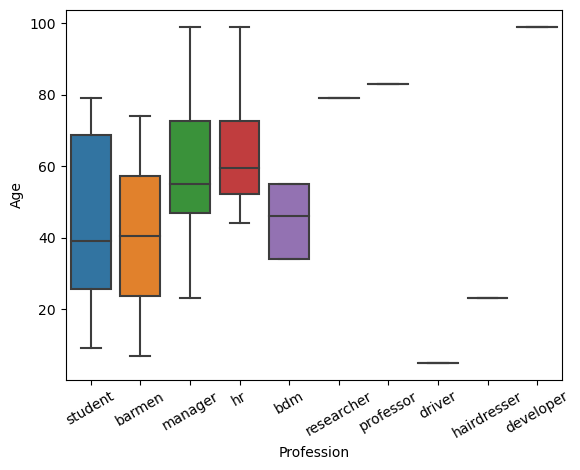

In [211]:
ax = sns.boxplot(data=df_clean_b,x="Profession",y="Age")
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


C:\Users\marci\AppData\Local\Temp\ipykernel_2120\3557323567.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(),rotation=30)


[Text(0, 0, 'student'),
 Text(1, 0, 'barmen'),
 Text(2, 0, 'manager'),
 Text(3, 0, 'hr'),
 Text(4, 0, 'bdm'),
 Text(5, 0, 'researcher'),
 Text(6, 0, 'professor'),
 Text(7, 0, 'driver'),
 Text(8, 0, 'hairdresser'),
 Text(9, 0, 'developer')]

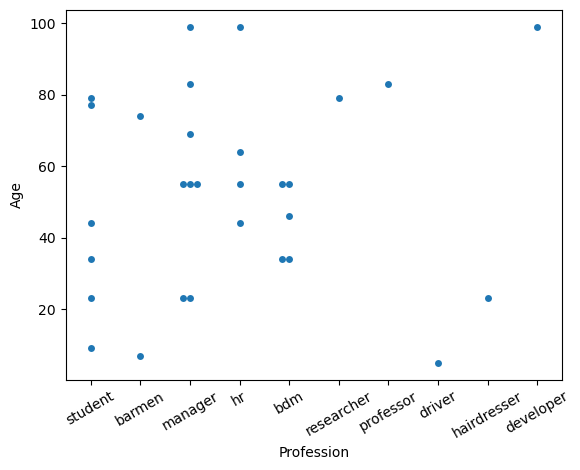

In [212]:
ax2 = sns.swarmplot(data=df_clean_b,x="Profession",y="Age")
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=30)



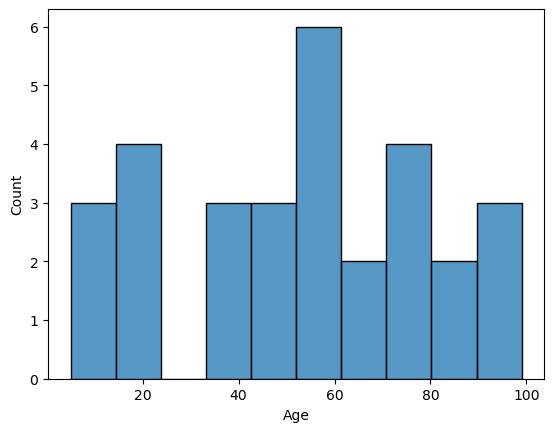

In [213]:
ax = sns.histplot(data=df_clean_b,x="Age", bins=10)


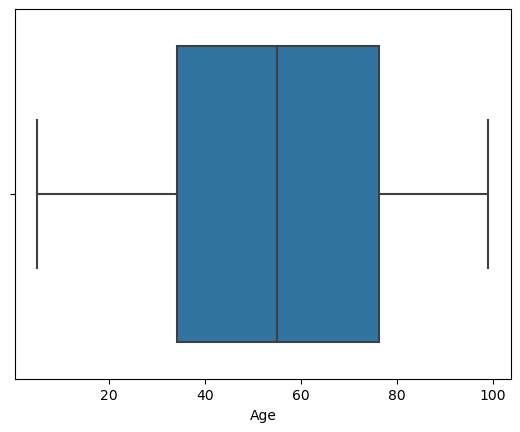

In [214]:
ax = sns.boxplot(data=df_clean_b,x="Age")


#### Because there are some entries that are unique per profession and client Id it is not possible to attribute a new Age or BirthYear. Will use the mean Age

In [215]:
df_clean_b["Age"].median()

55.0

In [216]:
q75 = int(df_clean_b["Age"].quantile(q=0.75))
print(q75); print(q75*1.5)
mean_age = df_clean_b["Age"].mean()
std_age = df_clean_b["Age"].std()
print(mean_age)
print(std_age)
check_row_ages = df_clean_b[df_clean_b["Age"] >q75]
print(check_row_ages)
life_expectancy = int(88 + 0.1*88)

76
114.0
52.8
27.64728583049525
    TransactionID  ClientID  BirthYear   Amount  Profession    Risk  Age
2               3     34984       1945     3450     student  Medium   77
3               4     34985       1923     5670     manager     Low   99
15             11     34992       1943    21210  researcher  Medium   79
16             12     34993       1939    23430   professor     Low   83
19             16     34997       1923  2399090   developer    High   99
23             20     35001       1943    14550     student  Medium   79
24             21     35002       1939    16770     manager     Low   83
25             25     35006       1923    33050          hr    High   99


In [ ]:
def check_profession_age(grouped_df,df, profesion_column = "Profession", age_column= "Age", limit_value = 99 ):
    profesion_check = grouped_df["Profession"].values[0]

def replace_value(df : pd.DataFrame , filter_value : str, filter_column : str = "Profession",target_column : str = "Age"):
    """ 
    filter_value : Name of value used to filter the filter_column in Dataframe

    """
    if df[df[filter_column]== filter_value].shape[0] > 1:
        mean_age_prof = df[df[filter_column]== filter_value].loc[:,target_column].median()
    else:
        mean_age_prof = df[target_column].median()

In [235]:
for client_i, gclient in df_clean_b.groupby("ClientID"):
    if gclient.shape[0] == 1:
        if gclient["Age"].values[0] > life_expectancy:
            print(gclient)
            indx_tochange = gclient.index
            print(indx_tochange)
            #Get profession to see if there are other values for same profession
            profesion_check = gclient["Profession"].values[0]
            
            if df_clean_b[df_clean_b["Profession"]== profesion_check].shape[0] > 1:
                mean_age_prof = df_clean_b[df_clean_b["Profession"]== profesion_check].loc[:,"Age"].median()
            else:
                mean_age_prof = df_clean_b["Age"].median()
            print(mean_age_prof)
                    #print(indx_tochange)
            df_clean_b.loc[indx_tochange,"Age"] =int(mean_age_prof)
            df_clean_b.loc[indx_tochange,"BirthYear"] = year_now - int(mean_age_prof)

        if (gclient["Profession"].values[0] != "student") and (gclient["Age"].values[0]<18):
            print(gclient)
            indx_tochange = gclient[gclient["Age"]<18].index

            profesion_check = gclient["Profession"].values[0]
            if df_clean_b[df_clean_b["Profession"]== profesion_check].shape[0] > 1:
                mean_age_prof = df_clean_b[df_clean_b["Profession"]== profesion_check].loc[:,"Age"].median()
            else:
                mean_age_prof = df_clean_b["Age"].median()
            print(mean_age_prof)
                    #print(indx_tochange)
            df_clean_b.loc[indx_tochange,"Age"] =int(mean_age_prof)
            df_clean_b.loc[indx_tochange,"BirthYear"] = year_now - int(mean_age_prof)

    else:
        if gclient["Age"].unique().shape[0]>1:
            print(gclient)
            print(gclient["Age"].mode())
            gclient["Age"] = gclient["Age"].mode()[0]
        if gclient[gclient["Age"]>life_expectancy].shape[0] > 0:
            print(gclient)
            indx_tochange = gclient[gclient["Age"]>life_expectancy].index

            profesion_check = gclient["Profession"].values[0]
            if df_clean_b[df_clean_b["Profession"]== profesion_check].shape[0] > 1:
                mean_age_prof = df_clean_b[df_clean_b["Profession"]== profesion_check].loc[:,"Age"].median()
            else:
                mean_age_prof = df_clean_b["Age"].median()
            print(mean_age_prof)

            #print(indx_tochange)
            df_clean_b.loc[indx_tochange,"Age"] =int(mean_age_prof)
            df_clean_b.loc[indx_tochange,"BirthYear"] = year_now - int(mean_age_prof)
        if  (gclient["Profession"].values[0] != "student") and (gclient[gclient["Age"]<18].shape[0] >0):
            print(gclient)
            profesion_check = gclient["Profession"].values[0]
            if df_clean_b[df_clean_b["Profession"]== profesion_check].shape[0] > 1:
                mean_age_prof = df_clean_b[df_clean_b["Profession"]== profesion_check].loc[:,"Age"].median()
            else:
                mean_age_prof = df_clean_b["Age"].median()
            print(mean_age_prof)
                    #print(indx_tochange)
            df_clean_b.loc[indx_tochange,"Age"] =int(mean_age_prof)
            df_clean_b.loc[indx_tochange,"BirthYear"] = year_now - int(mean_age_prof)

    TransactionID  ClientID  BirthYear  Amount Profession    Risk  Age
10              8     34989       1958   14550         hr    High   64
11             24     34989       1967   27870         hr  Medium   55
0    55
1    64
Name: Age, dtype: int32
    TransactionID  ClientID  BirthYear  Amount Profession    Risk  Age
27             27     35008       1967   41930        bdm     Low   55
28             28     35008       1967   46370        bdm    High   55
29             29     35008       1976   50810        bdm  Medium   46
0    55
Name: Age, dtype: int32


In [236]:
df_clean_b

,TransactionID,ClientID,BirthYear,Amount,Profession,Risk,Age
0,1,34982,2013,12900,student,Low,9
1,2,34983,1982,1230,barmen,High,40
2,3,34984,1945,3450,student,Medium,77
3,4,34985,1967,5670,manager,Low,55
4,5,34986,1978,7890,hr,High,44
5,6,34987,1967,10110,manager,Medium,55
6,15,34987,1967,30090,manager,Low,55
7,22,34987,1967,18990,manager,High,55
8,23,34988,1999,25650,manager,Low,23
9,7,34988,1999,12330,manager,Medium,23


C:\Users\marci\AppData\Local\Temp\ipykernel_2120\945801739.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(),rotation=30)


[Text(0, 0, 'student'),
 Text(1, 0, 'barmen'),
 Text(2, 0, 'manager'),
 Text(3, 0, 'hr'),
 Text(4, 0, 'bdm'),
 Text(5, 0, 'researcher'),
 Text(6, 0, 'professor'),
 Text(7, 0, 'driver'),
 Text(8, 0, 'hairdresser'),
 Text(9, 0, 'developer')]

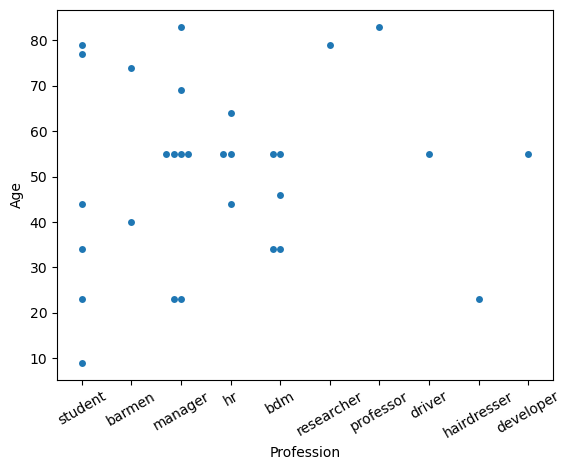

In [237]:
ax2 = sns.swarmplot(data=df_clean_b,x="Profession",y="Age")
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=30)

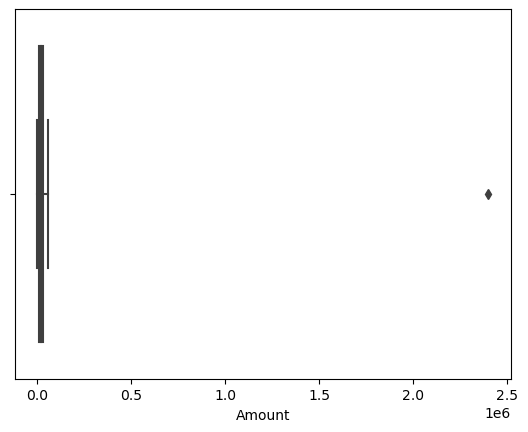

In [239]:
ax3 = sns.boxplot(data=df_clean_b, x="Amount")

#### Calculating OUTLIERS using IQT methods

In [243]:
q_75 = df_clean_b["Amount"].quantile(q=0.75)
q_25 = df_clean_b["Amount"].quantile(q=0.25)
itq = q_75 - q_25
bottom_lim = q_25 - 1.5*itq
upp_lim = q_75 + 1.5*itq

In [244]:
df_clean_b[(df_clean_b["Amount"]<bottom_lim)|(df_clean_b["Amount"]>upp_lim)]

,TransactionID,ClientID,BirthYear,Amount,Profession,Risk,Age
19,16,34997,1967,2399090,developer,High,55


In [246]:
df_clean_b.drop(labels=19,axis=0, inplace=True)

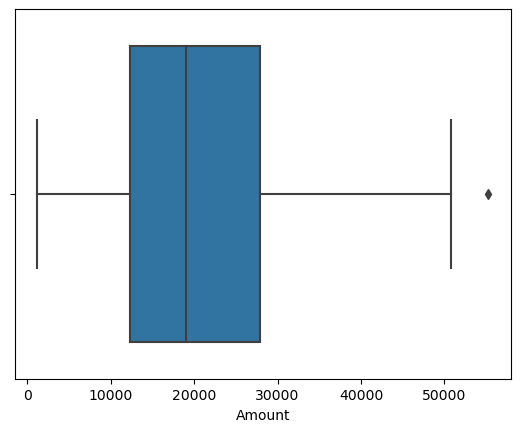

In [247]:
ax3 = sns.boxplot(data=df_clean_b, x="Amount")

In [248]:
df_clean_b.sort_values(by="Amount", ascending=False)

,TransactionID,ClientID,BirthYear,Amount,Profession,Risk,Age
14,30,34991,1988,55250,bdm,High,34
29,29,35008,1976,50810,bdm,Medium,46
28,28,35008,1967,46370,bdm,High,55
27,27,35008,1967,41930,bdm,Low,55
26,26,35007,1999,37490,student,Medium,23
25,25,35006,1967,33050,hr,High,55
6,15,34987,1967,30090,manager,Low,55
18,14,34995,1999,27870,hairdresser,Low,23
11,24,34989,1967,27870,hr,Medium,55
17,13,34994,1967,25650,driver,Medium,55
